In [1]:
import pandas as pd

In [4]:
pd.__version__

'1.4.2'

In [5]:
!pip install -q pyarrow

In [6]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')

In [7]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.00
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.00
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.00
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.00
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.00
5,1,2024-01-01 00:54:08,2024-01-01 01:26:31,1.0,4.70,1.0,N,148,141,1,29.6,3.5,0.5,6.90,0.0,1.0,41.50,2.5,0.00
6,2,2024-01-01 00:49:44,2024-01-01 01:15:47,2.0,10.82,1.0,N,138,181,1,45.7,6.0,0.5,10.00,0.0,1.0,64.95,0.0,1.75
7,1,2024-01-01 00:30:40,2024-01-01 00:58:40,0.0,3.00,1.0,N,246,231,2,25.4,3.5,0.5,0.00,0.0,1.0,30.40,2.5,0.00
8,2,2024-01-01 00:26:01,2024-01-01 00:54:12,1.0,5.44,1.0,N,161,261,2,31.0,1.0,0.5,0.00,0.0,1.0,36.00,2.5,0.00
9,2,2024-01-01 00:28:08,2024-01-01 00:29:16,1.0,0.04,1.0,N,113,113,2,3.0,1.0,0.5,0.00,0.0,1.0,8.00,2.5,0.00


In [8]:
import sklearn

# Homework 1

In [1]:
import pandas as pd
import numpy as np

yellow_taxi = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet")

In [3]:
yellow_taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Question 1

In [3]:
yellow_taxi.columns.__len__()

19

# Question 2 Compute Duration

Understand the `TimeDelta` dtype in pandas!

In [2]:
def duration_in_minutes(df):
    duration = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    return duration / pd.Timedelta(minutes=1)

yellow_taxi['duration'] = duration_in_minutes(yellow_taxi)

In [3]:
yellow_taxi['duration'][:5]

0     8.433333
1     6.316667
2    12.750000
3     9.616667
4    10.833333
Name: duration, dtype: float64

In [4]:
yellow_taxi['duration'].std()

42.59435124195458

In [5]:
yellow_taxi.duration.describe(percentiles=[0.95, 0.97, 0.98, 0.99])

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
50%      1.151667e+01
95%      3.646667e+01
97%      4.335000e+01
98%      4.873333e+01
99%      5.725000e+01
max      1.002918e+04
Name: duration, dtype: float64

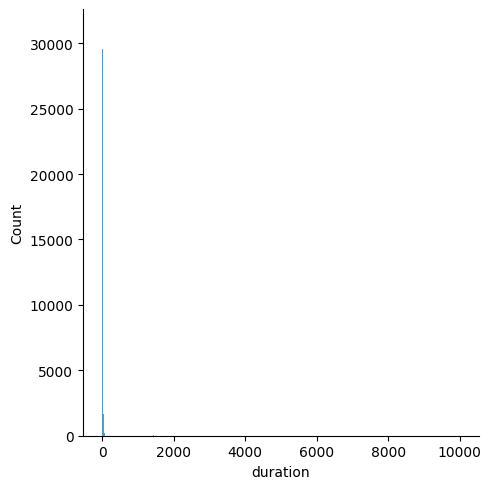

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(yellow_taxi.duration)

# Question 3 Filter Out Outliers

In [8]:
filtered_df = yellow_taxi[ (yellow_taxi.duration >= 1) & (yellow_taxi.duration <= 60)]
filtered_rows = filtered_df.shape[0]
filtered_rows

3009173

In [9]:
filtered_rows / yellow_taxi.shape[0]

0.9812202822125979

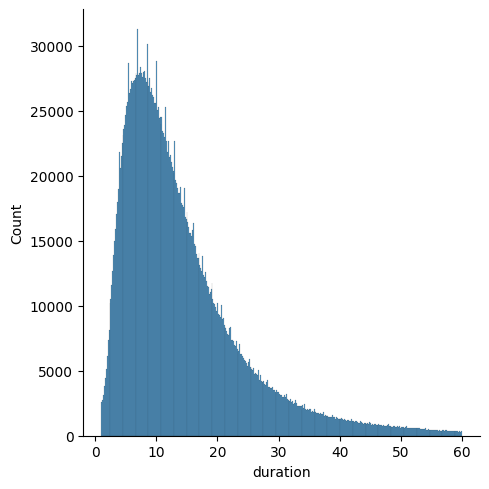

In [11]:
sns.displot(filtered_df.duration)

Sample the df cause it's too large.

In [9]:
df = filtered_df.sample(frac=0.05, random_state=42)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150459 entries, 1504444 to 2095672
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               150459 non-null  int64         
 1   tpep_pickup_datetime   150459 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  150459 non-null  datetime64[ns]
 3   passenger_count        146946 non-null  float64       
 4   trip_distance          150459 non-null  float64       
 5   RatecodeID             146946 non-null  float64       
 6   store_and_fwd_flag     146946 non-null  object        
 7   PULocationID           150459 non-null  int64         
 8   DOLocationID           150459 non-null  int64         
 9   payment_type           150459 non-null  int64         
 10  fare_amount            150459 non-null  float64       
 11  extra                  150459 non-null  float64       
 12  mta_tax                150459 non-nul

# Question 4 One-hot encoding

In [11]:
# Suggested way to prepare dict for the dict_vectorizer, by pandas built-in to_dict() method

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

# make sure 'DOLocationID' is str type, otherwise the dictvectorizer
# will treat it as numeric, hence not one-hot encoding it

df[categorical] = df[categorical].astype(str)

# turn to dict
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts[:5]

[{'PULocationID': '238', 'DOLocationID': '74', 'trip_distance': 2.8},
 {'PULocationID': '87', 'DOLocationID': '4', 'trip_distance': 2.6},
 {'PULocationID': '142', 'DOLocationID': '140', 'trip_distance': 2.06},
 {'PULocationID': '236', 'DOLocationID': '231', 'trip_distance': 9.11},
 {'PULocationID': '234', 'DOLocationID': '230', 'trip_distance': 1.73}]

In [13]:
# Fit a dictionary vectorizer

from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()

# feature matrix array:
X_train = vec.fit_transform(train_dicts)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 451377 stored elements and shape (150459, 479)>

In [14]:
vec.feature_names_[:10]

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11']

In [15]:
feature_names = vec.get_feature_names_out()

In [16]:
# display feature names
np.random.choice(feature_names, size=10)

array(['DOLocationID=114', 'DOLocationID=62', 'PULocationID=205',
       'DOLocationID=29', 'PULocationID=77', 'DOLocationID=181',
       'PULocationID=80', 'DOLocationID=7', 'DOLocationID=29',
       'PULocationID=213'], dtype=object)

# Question 5 linear regression

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data
What's the RMSE on train?

In [18]:
X_train.shape

(150459, 479)

In [19]:
y_train = df.duration.values

In [20]:
from sklearn import linear_model

reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [22]:
from sklearn.metrics import root_mean_squared_error

y_pred = reg.predict(X_train)
y_true = df.duration.values

root_mean_squared_error(y_true, y_pred)

7.574624168432453

# Export models

In [23]:
import pickle

# dump DictVectorizer + LinearRegressor
with open('./models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((vec, reg), f_out)

# Question 6 Validation

In [26]:
validation_df = pd.read_parquet("https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet")

In [27]:
validation_df['duration'] = duration_in_minutes(validation_df)

filtered_val = validation_df[(validation_df.duration <= 60) & (validation_df.duration >= 1)]

feature_val = get_feature_dict(filtered_val)
feature_matrix_val = vec.transform(feature_val).toarray()

feature_matrix_val

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
feature_matrix_val.shape

(2855951, 515)